In [1]:
!conda install --name root sk-learn -y

Fetching package metadata ...........

PackageNotFoundError: Packages missing in current channels:
            
  - sk-learn

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/linux-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/linux-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/linux-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/linux-64
  - https://repo.continuum.io/pkgs/pro/noarch
            



In [2]:
!conda install --name root pandas -y

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda3_431:
#
pandas                    0.20.3           py36h842e28d_2  


In [5]:
!conda install --name root -c conda-forge tensorflow -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:     4.3.27-py36h2866c0b_0 --> 4.3.27-py36_0 conda-forge
    conda-env: 2.6.0-h36134e3_1      --> 2.6.0-0       conda-forge



In [6]:
!conda install --name root keras -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following packages will be UPDATED:

    conda-env: 2.6.0-0       conda-forge --> 2.6.0-h36134e3_1     

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:     4.3.27-py36_0 conda-forge --> 4.3.27-py36h2866c0b_0



In [9]:
!conda install --name root dask -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following NEW packages will be INSTALLED:

    dask-core:        0.15.3-py36h10e6167_0
    distributed:      1.19.1-py36h25f3894_0
    sortedcontainers: 1.5.7-py36hdf89491_0 
    tblib:            1.3.2-py36h34cf8b6_0 
    zict:             0.1.3-py36h3a3bf81_0 

The following packages will be UPDATED:

    dask:             0.13.0-py36_0         --> 0.15.3-py36hdc2c8aa_0
    partd:            0.3.7-py36_0          --> 0.3.8-py36h36fd896_0 
    tornado:          4.4.2-py36_0          --> 4.5.2-py36h1283b2a_0 

dask-core-0.15 100% |################################| Time: 0:00:00   6.34 MB/s
sortedcontaine 100% |################################| Time: 0:00:00  20.06 MB/s
tblib-1.3.2-py 100% |################################| Time: 0:00:00  25.07 MB/s
tornado-4.5.2- 100% |################################| Time: 0:00:00  10.92 MB/s
partd-0

In [10]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

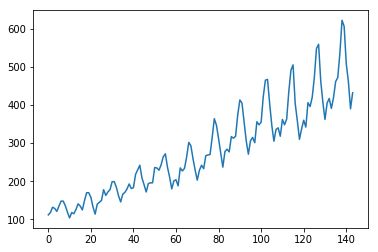

In [11]:
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [12]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Data normalization

In [13]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Training / Test data splitting

In [14]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48
96 48


# Create matrix considering 'n' previous timesteps

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [37]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#  Reshaping the input

In [38]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) # it is like a volume now (z is the feature)
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build LSTM Model

In [39]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0457
Epoch 2/100
0s - loss: 0.0207
Epoch 3/100
0s - loss: 0.0147
Epoch 4/100
0s - loss: 0.0129
Epoch 5/100
0s - loss: 0.0116
Epoch 6/100
0s - loss: 0.0104
Epoch 7/100
0s - loss: 0.0092
Epoch 8/100
0s - loss: 0.0081
Epoch 9/100
0s - loss: 0.0071
Epoch 10/100
0s - loss: 0.0062
Epoch 11/100
0s - loss: 0.0056
Epoch 12/100
0s - loss: 0.0049
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0041
Epoch 15/100
0s - loss: 0.0041
Epoch 16/100
0s - loss: 0.0039
Epoch 17/100
0s - loss: 0.0038
Epoch 18/100
0s - loss: 0.0038
Epoch 19/100
0s - loss: 0.0038
Epoch 20/100
0s - loss: 0.0037
Epoch 21/100
0s - loss: 0.0037
Epoch 22/100
0s - loss: 0.0037
Epoch 23/100
0s - loss: 0.0036
Epoch 24/100
0s - loss: 0.0035
Epoch 25/100
0s - loss: 0.0035
Epoch 26/100
0s - loss: 0.0035
Epoch 27/100
0s - loss: 0.0035
Epoch 28/100
0s - loss: 0.0036
Epoch 29/100
0s - loss: 0.0035
Epoch 30/100
0s - loss: 0.0035
Epoch 31/100
0s - loss: 0.0035
Epoch 32/100
0s - loss: 0.0034
Epoch 33/100
0s -

In [40]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.10 RMSE


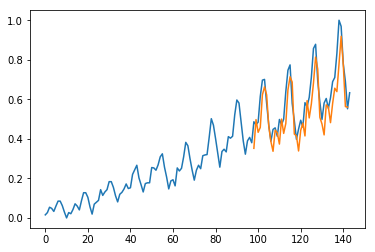

In [43]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()